In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, log_loss

In [12]:
dataset = "https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/refs/heads/main/datasets/breast_cancer.csv"

data = pd.read_csv(dataset, index_col=0)

X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

In [ ]:
from sklearn.calibration import LabelEncoder

laenc = LabelEncoder()

y = laenc.fit_transform(y)

laenc.classes_

array(['B', 'M'], dtype=object)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
ss = StandardScaler()

X_train[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = ss.transform(X_test[X_test.columns])

In [36]:
def fit_classifier(model, batch_size=[16, 32, 64, 128, 256], epochs=100, dataset=None):

    if dataset is None:
        dataset = (X_train, y_train)
        
    log_losses = []
    X, y = dataset

    for bs in batch_size:
        print(f"Training with batch size: {bs}:\n")

        for epoch in range(epochs):
            # Shuffle the training set
            X_train, y_train = shuffle(X, y)

            for i in range(0, len(X_train), bs):

                # Get the current batch
                X_batch = X_train[i:i+bs]
                y_batch = y_train[i:i+bs]

                # Fit the model on the current batch
                model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

                # Evaluate the model
                y_pred = model.predict(X_test)
                y_proba = model.predict_proba(X_test)

                # Compute the loss and accuracy
                loss = log_loss(y_test, y_proba)
                accuracy = accuracy_score(y_test, y_pred)

                log_losses.append(loss)

                print(f"Epoch: {epoch} - Loss: {loss:.2f}, Accuracy: {accuracy:.2f}")
                
    return log_losses

In [17]:
from datetime import datetime

log_losses = []

model = SGDClassifier(loss="log_loss", max_iter=1000, tol=0.001, validation_fraction=0.1, n_iter_no_change=5)

epochs = 10
batch_size = [16]

start_time = datetime.now()

log_losses= fit_classifier(model, dataset=(X_train, y_train), batch_size=batch_size, epochs=epochs)

end_time = datetime.now()
print(f"Training time: {end_time-start_time}")

Training with batch size: 16:

Epoch: 0 - Loss: 6.582015774212795, Accuracy: 0.79
Epoch: 0 - Loss: 3.79245996240008, Accuracy: 0.89
Epoch: 0 - Loss: 3.79452690907278, Accuracy: 0.89
Epoch: 0 - Loss: 2.7203982153279775, Accuracy: 0.91
Epoch: 0 - Loss: 1.4055643702740488, Accuracy: 0.95
Epoch: 0 - Loss: 0.5893339375742976, Accuracy: 0.97
Epoch: 0 - Loss: 0.5723778807264219, Accuracy: 0.97
Epoch: 0 - Loss: 0.36043654195625846, Accuracy: 0.99
Epoch: 0 - Loss: 0.36043655088074544, Accuracy: 0.99
Epoch: 0 - Loss: 0.3604365689519742, Accuracy: 0.99
Epoch: 0 - Loss: 0.36043660483129225, Accuracy: 0.99
Epoch: 0 - Loss: 0.40312101464587363, Accuracy: 0.98
Epoch: 0 - Loss: 0.9554768009335932, Accuracy: 0.97
Epoch: 0 - Loss: 0.9575215116497999, Accuracy: 0.97
Epoch: 0 - Loss: 0.9595134177340099, Accuracy: 0.97
Epoch: 0 - Loss: 0.7890460906122986, Accuracy: 0.97
Epoch: 0 - Loss: 0.5821300372272787, Accuracy: 0.98
Epoch: 0 - Loss: 0.5831234245694518, Accuracy: 0.98
Epoch: 0 - Loss: 0.584108156766682

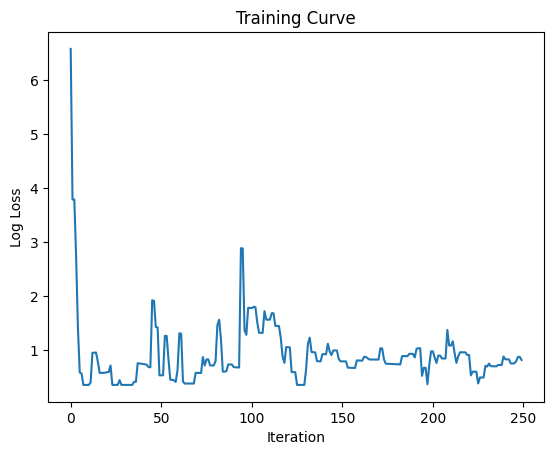

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_curve():

    plt.plot(log_losses)

    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.title("Training Curve")

    plt.show()

plot_training_curve()


In [32]:
new_data_csv = "https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/refs/heads/main/datasets/breast_cancer_update.csv"

new_data = pd.read_csv(new_data_csv, index_col=0)
df = pd.concat([data, new_data])

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

y = laenc.transform(y)

X.head(5)

,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,fractal dimension mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worstse,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
ID number,,,,,,,,,,,,,,,,,,,,,
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
X_train[X_train.columns] = ss.transform(X_train[X_train.columns])
X_test[X_test.columns] = ss.transform(X_test[X_test.columns])

In [40]:
start_time = datetime.now()

log_losses = fit_classifier(model, dataset=(X_train, y_train), batch_size=[32, 64, 128, 256, 512], epochs=100)

end_time = datetime.now()
print(f"Training time: {end_time-start_time}")

Training with batch size: 32:

Epoch: 0 - Loss: 0.32, Accuracy: 0.93
Epoch: 0 - Loss: 0.32, Accuracy: 0.93
Epoch: 0 - Loss: 0.31, Accuracy: 0.93
Epoch: 0 - Loss: 0.31, Accuracy: 0.93
Epoch: 0 - Loss: 0.31, Accuracy: 0.93
Epoch: 0 - Loss: 0.31, Accuracy: 0.93
Epoch: 0 - Loss: 0.31, Accuracy: 0.93
Epoch: 0 - Loss: 0.31, Accuracy: 0.93
Epoch: 0 - Loss: 0.31, Accuracy: 0.93
Epoch: 0 - Loss: 0.31, Accuracy: 0.93
Epoch: 0 - Loss: 0.32, Accuracy: 0.93
Epoch: 0 - Loss: 0.32, Accuracy: 0.93
Epoch: 0 - Loss: 0.32, Accuracy: 0.93
Epoch: 0 - Loss: 0.32, Accuracy: 0.93
Epoch: 0 - Loss: 0.32, Accuracy: 0.93
Epoch: 1 - Loss: 0.32, Accuracy: 0.93
Epoch: 1 - Loss: 0.32, Accuracy: 0.93
Epoch: 1 - Loss: 0.32, Accuracy: 0.93
Epoch: 1 - Loss: 0.32, Accuracy: 0.93
Epoch: 1 - Loss: 0.32, Accuracy: 0.93
Epoch: 1 - Loss: 0.32, Accuracy: 0.93
Epoch: 1 - Loss: 0.32, Accuracy: 0.93
Epoch: 1 - Loss: 0.32, Accuracy: 0.93
Epoch: 1 - Loss: 0.32, Accuracy: 0.93
Epoch: 1 - Loss: 0.32, Accuracy: 0.93
Epoch: 1 - Loss: 0.

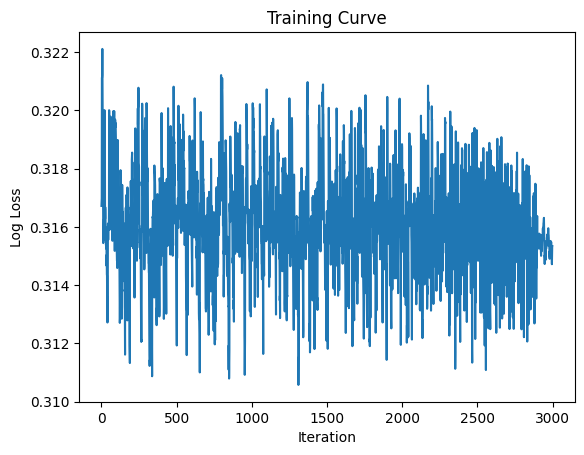

In [39]:
plot_training_curve()